In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:\\Users\\Siddharth\\Desktop\\Projects\\Projects\\Marketing_campaign\\loan_acceptors.csv")
#data.head(10)

In [12]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 13].values

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10) 

In [13]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [14]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = (tn+tp)/(tn+fp+fn+tp)*100
#model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}%'.format(model_accuracy))

[[404  48]
 [ 22  26]]
             precision    recall  f1-score   support

          0       0.95      0.89      0.92       452
          1       0.35      0.54      0.43        48

avg / total       0.89      0.86      0.87       500

Model accuracy: 86.00%


In [17]:
pred_proba = clf.predict_proba(X_test)

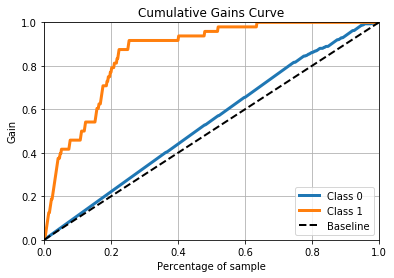

In [18]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, pred_proba)
plt.show()

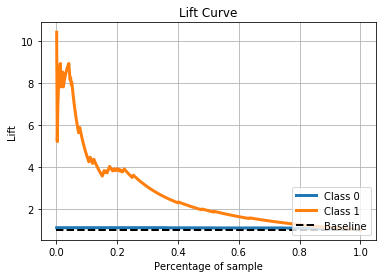

In [19]:
skplt.metrics.plot_lift_curve(y_test, pred_proba)
plt.show()